<a href="https://colab.research.google.com/github/e18679/ML0930/blob/master/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,255,253,227,42,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180,253,251,251,142,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,16,190,253,251,251,236,61,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,109,251,253,251,251,251,71,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,109,251,253,251,251,251,71,0,0,0,0,0,0,0,0


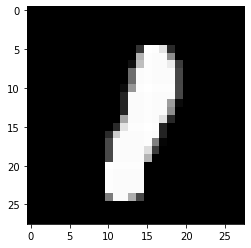

In [3]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import random
import matplotlib.pyplot as plt
import pandas as pd
idx = random.randint(0, 59999)
plt.imshow(x_train[idx], cmap="gray")
pd.DataFrame(x_train[idx])

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers=[
        # 784 * 128 + 128
        Dense(256 ,activation="relu", input_dim=784),
        # 128 * 10 +  10(bias)
        Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [5]:
# x: scaling 0-255 -> 0-1 框架(tf)隨機係數的關係
# y: one-hot encoding 十個答案
from tensorflow.keras.utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0], y_train_cat[0])
# x_train_norm[0]

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [7]:
# batch: 100`200(小圖片) 10`20(大圖片)
# epoch: 整份資料要看幾遍
# 60000筆, 2epoch, 200batch -> 60000 * 2 / 200次調整
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm, 
     y_train_cat,
     batch_size=100,
     epochs=50,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

Epoch 1/50
540/540 - 2s - loss: 0.3032 - accuracy: 0.9145 - val_loss: 0.1286 - val_accuracy: 0.9662
Epoch 2/50
540/540 - 2s - loss: 0.1287 - accuracy: 0.9627 - val_loss: 0.0994 - val_accuracy: 0.9730
Epoch 3/50
540/540 - 2s - loss: 0.0883 - accuracy: 0.9744 - val_loss: 0.0801 - val_accuracy: 0.9772
Epoch 4/50
540/540 - 2s - loss: 0.0639 - accuracy: 0.9816 - val_loss: 0.0781 - val_accuracy: 0.9775
Epoch 5/50
540/540 - 2s - loss: 0.0499 - accuracy: 0.9855 - val_loss: 0.0771 - val_accuracy: 0.9775
Epoch 6/50
540/540 - 2s - loss: 0.0382 - accuracy: 0.9893 - val_loss: 0.0708 - val_accuracy: 0.9787
Epoch 7/50
540/540 - 2s - loss: 0.0305 - accuracy: 0.9912 - val_loss: 0.0810 - val_accuracy: 0.9765
Epoch 8/50
540/540 - 2s - loss: 0.0244 - accuracy: 0.9932 - val_loss: 0.0759 - val_accuracy: 0.9790
Epoch 9/50
540/540 - 2s - loss: 0.0194 - accuracy: 0.9949 - val_loss: 0.0668 - val_accuracy: 0.9810
Epoch 10/50
540/540 - 2s - loss: 0.0148 - accuracy: 0.9964 - val_loss: 0.0733 - val_accuracy: 0.9797

In [8]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0623 - accuracy: 0.9806


[0.06231408193707466, 0.9805999994277954]

In [9]:
# 手動儲存: model.save("model.h5")
# if not os.path.exists("model.h5"):
#    newmodel/compile
# else:
#    load_model("model.h5")
from tensorflow.keras.models import load_model
load = load_model("model.h5")
# 不用再compile, 可以直接繼續fit
load.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0623 - accuracy: 0.9806


[0.06231408193707466, 0.9805999994277954]

In [10]:
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      index=["{}(原本)".format(n) for n in range(10)],
      columns=["{}(預測)".format(n) for n in range(10)])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(原本),967,0,1,1,2,1,4,1,3,0
1(原本),0,1126,2,0,0,1,1,1,4,0
2(原本),3,1,1012,1,1,0,3,4,7,0
3(原本),0,0,2,993,0,1,0,4,7,3
4(原本),0,0,4,0,962,0,3,1,1,11
5(原本),1,0,0,10,0,867,4,1,9,0
6(原本),3,3,1,1,4,8,932,0,6,0
7(原本),0,2,8,4,1,0,0,1009,1,3
8(原本),0,0,2,3,0,2,0,2,963,2
9(原本),3,3,0,7,9,1,0,6,5,975


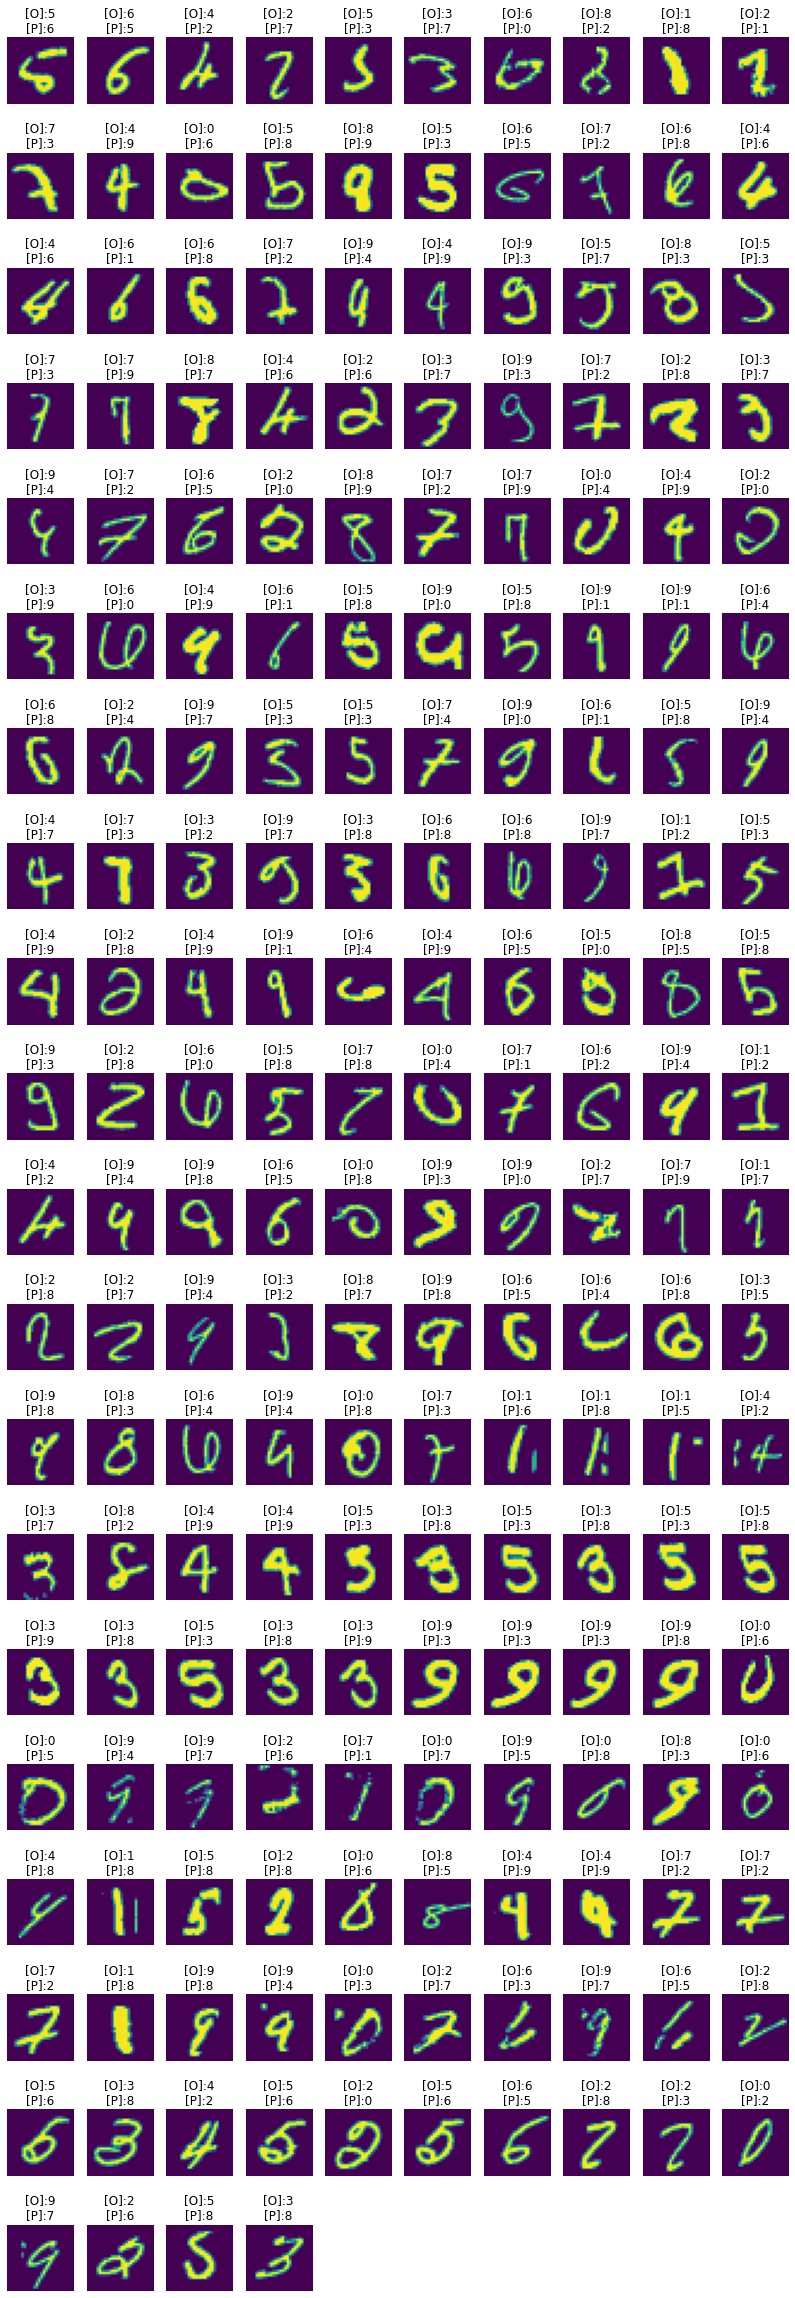

In [11]:
# subplot(總高度, 總寬度, ith)
import numpy as np
idx = np.nonzero(pre != y_test)[0]
false_img = x_test[idx]
false_label = y_test[idx]
false_pre = pre[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(false_img) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[O]:{}\n[P]:{}".format(false_label[i], false_pre[i])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])

In [ ]:
# pip install pillow
import PIL
fn = input("檔名")
img = PIL.Image.open(fn).convert("L").resize((28, 28))
img_np = np.array(img)
test = img_np.reshape(1, 784) / 255
probs = model.predict(test)[0]
for i, p in enumerate(probs):
    print(i, "的機率是:", round(p, 3))
plt.imshow(img_np)